# Imports

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [8]:
import tensorflow_model_optimization as tfmot

# Utils

In [3]:
class BestEpochTracker(Callback):
    def __init__(self):
        super().__init__()
        self.best_epoch = None
        self.best_val_loss = float("inf")

    def on_epoch_end(self, epoch, logs=None):
        if logs and "val_loss" in logs:
            current_val_loss = logs["val_loss"]
            if current_val_loss < self.best_val_loss:
                self.best_val_loss = current_val_loss
                self.best_epoch = epoch + 1

# Test

In [1]:
from model.models import NeuralNetworkModel
from dataset.dataset import Dataset

In [2]:
train_folder_path = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/reduced/left/'
test_folder_path = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/left/'

left_ds = Dataset(train_folder_path, test_folder_path, 16, 100)

==== Loading train and validation data ====
Found 112 files belonging to 14 classes.
Using 92 files for training.
Using 20 files for validation.
==== Loading test data ====
Found 30 files belonging to 14 classes.
==== Preparing datasets ====


In [7]:
left_model = NeuralNetworkModel(left_ds.num_classes)

==== Building model ====


In [8]:
left_model.compile_model()
left_model.train(left_ds.train_ds, 15, left_ds.val_ds)

==== Compiling model ====
==== Training and validating model ====
Epoch 1/15
6/6 [==============================] - 4s 208ms/step - loss: 2.6658 - accuracy: 0.1413 - val_loss: 2.6965 - val_accuracy: 0.1000
Epoch 2/15
6/6 [==============================] - 0s 82ms/step - loss: 2.5187 - accuracy: 0.2609 - val_loss: 2.7626 - val_accuracy: 0.1000
Epoch 3/15
6/6 [==============================] - 1s 112ms/step - loss: 2.2630 - accuracy: 0.3261 - val_loss: 2.5006 - val_accuracy: 0.1500
Epoch 4/15
6/6 [==============================] - 1s 86ms/step - loss: 1.7332 - accuracy: 0.5217 - val_loss: 2.0699 - val_accuracy: 0.1500
Epoch 5/15
6/6 [==============================] - 1s 105ms/step - loss: 1.2337 - accuracy: 0.6087 - val_loss: 1.6125 - val_accuracy: 0.4500
Epoch 6/15
6/6 [==============================] - 0s 82ms/step - loss: 0.9426 - accuracy: 0.6848 - val_loss: 1.6666 - val_accuracy: 0.4000
Epoch 7/15
6/6 [==============================] - 0s 81ms/step - loss: 0.8171 - accuracy: 0.6957 

In [9]:
left_model.load_weights()

In [6]:
left_model.evaluate(left_ds.test_ds)

1/1 [==============================] - 0s 111ms/step


0.6666667

In [7]:
left_model.build_model()
left_model.compile_model()
left_model.train(left_ds.train_val_ds, left_model.best_epoch)

==== Building model ====
==== Compiling model ====
==== Training model ====
Epoch 1/8
8/8 [==============================] - 1s 68ms/step - loss: 2.6504 - accuracy: 0.0714
Epoch 2/8
8/8 [==============================] - 1s 68ms/step - loss: 2.5271 - accuracy: 0.1071
Epoch 3/8
8/8 [==============================] - 1s 68ms/step - loss: 2.2245 - accuracy: 0.2679
Epoch 4/8
8/8 [==============================] - 1s 69ms/step - loss: 1.6926 - accuracy: 0.4286
Epoch 5/8
8/8 [==============================] - 1s 71ms/step - loss: 1.2613 - accuracy: 0.6071
Epoch 6/8
8/8 [==============================] - 1s 69ms/step - loss: 0.9156 - accuracy: 0.7411
Epoch 7/8
8/8 [==============================] - 1s 69ms/step - loss: 0.7045 - accuracy: 0.7679
Epoch 8/8
8/8 [==============================] - 1s 71ms/step - loss: 0.4642 - accuracy: 0.8304


In [8]:
left_model.evaluate(left_ds.test_ds)

1/1 [==============================] - 0s 111ms/step


0.6666667

In [32]:
left_model = NeuralNetworkModel(left_ds.num_classes)
left_model.load_saved_weights(model_path = "./model_checkpoint/left_model_reduced")

==== Building model ====


In [33]:
left_model.evaluate(left_ds.test_ds)

1/1 [==============================] - 0s 333ms/step


0.76666665

In [3]:
pruned_left_model = NeuralNetworkModel(left_ds.num_classes, 0.3)

==== Building model ====


In [4]:
pruned_left_model.compile_model()
pruned_left_model.train(left_ds.train_ds, 15, left_ds.val_ds)

==== Compiling model ====
==== Training and validating model ====
Epoch 1/15
6/6 [==============================] - 2s 132ms/step - loss: 2.6610 - accuracy: 0.1087 - val_loss: 2.6180 - val_accuracy: 0.1000
Epoch 2/15
6/6 [==============================] - 1s 113ms/step - loss: 2.5418 - accuracy: 0.2391 - val_loss: 2.5667 - val_accuracy: 0.1000
Epoch 3/15
6/6 [==============================] - 1s 91ms/step - loss: 2.3540 - accuracy: 0.2065 - val_loss: 2.5310 - val_accuracy: 0.1000
Epoch 4/15
6/6 [==============================] - 1s 117ms/step - loss: 2.1036 - accuracy: 0.3261 - val_loss: 2.2276 - val_accuracy: 0.2000
Epoch 5/15
6/6 [==============================] - 1s 122ms/step - loss: 1.9597 - accuracy: 0.3043 - val_loss: 1.8966 - val_accuracy: 0.4000
Epoch 6/15
6/6 [==============================] - 1s 93ms/step - loss: 1.6084 - accuracy: 0.4457 - val_loss: 1.7502 - val_accuracy: 0.3000
Epoch 7/15
6/6 [==============================] - 1s 86ms/step - loss: 1.4339 - accuracy: 0.5109

In [5]:
pruned_left_model.load_weights()
pruned_left_model.evaluate(left_ds.test_ds)

1/1 [==============================] - 0s 147ms/step


0.6

In [6]:
pruned_left_model.build_model()
pruned_left_model.compile_model()
pruned_left_model.train(left_ds.train_val_ds, pruned_left_model.best_epoch)

==== Building model ====
==== Compiling model ====
==== Training model ====
Epoch 1/9
8/8 [==============================] - 1s 68ms/step - loss: 2.6699 - accuracy: 0.0804
Epoch 2/9
8/8 [==============================] - 1s 67ms/step - loss: 2.5992 - accuracy: 0.2143
Epoch 3/9
8/8 [==============================] - 1s 68ms/step - loss: 2.4794 - accuracy: 0.1964
Epoch 4/9
8/8 [==============================] - 1s 68ms/step - loss: 2.1335 - accuracy: 0.2946
Epoch 5/9
8/8 [==============================] - 1s 68ms/step - loss: 1.8612 - accuracy: 0.3929
Epoch 6/9
8/8 [==============================] - 1s 75ms/step - loss: 1.7224 - accuracy: 0.4732
Epoch 7/9
8/8 [==============================] - 1s 82ms/step - loss: 1.5056 - accuracy: 0.5000
Epoch 8/9
8/8 [==============================] - 1s 73ms/step - loss: 1.1260 - accuracy: 0.6786
Epoch 9/9
8/8 [==============================] - 1s 73ms/step - loss: 1.0225 - accuracy: 0.6607


In [7]:
pruned_left_model.evaluate(left_ds.test_ds)

1/1 [==============================] - 0s 119ms/step


0.6666667

In [8]:
train_folder_path = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/reduced/right modified/'
test_folder_path = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/right modified/'

right_ds = Dataset(train_folder_path, test_folder_path, 16, 100)

==== Loading train and validation data ====
Found 126 files belonging to 10 classes.
Using 104 files for training.
Using 22 files for validation.
==== Loading test data ====
Found 31 files belonging to 10 classes.
==== Preparing datasets ====


In [9]:
pruned_right_model = NeuralNetworkModel(right_ds.num_classes, 0.3)

==== Building model ====


In [10]:
pruned_right_model.compile_model()
pruned_right_model.train(right_ds.train_ds, 20, right_ds.val_ds)

==== Compiling model ====
==== Training and validating model ====
Epoch 1/20


7/7 [==============================] - 2s 137ms/step - loss: 1.9469 - accuracy: 0.4231 - val_loss: 1.5643 - val_accuracy: 0.5455
Epoch 2/20
7/7 [==============================] - 1s 78ms/step - loss: 1.6912 - accuracy: 0.4904 - val_loss: 1.4229 - val_accuracy: 0.5455
Epoch 3/20
7/7 [==============================] - 1s 115ms/step - loss: 1.3424 - accuracy: 0.5481 - val_loss: 1.2359 - val_accuracy: 0.6364
Epoch 4/20
7/7 [==============================] - 1s 97ms/step - loss: 1.1208 - accuracy: 0.6442 - val_loss: 1.1350 - val_accuracy: 0.6818
Epoch 5/20
7/7 [==============================] - 1s 82ms/step - loss: 0.8415 - accuracy: 0.7019 - val_loss: 1.0635 - val_accuracy: 0.6818
Epoch 6/20
7/7 [==============================] - 1s 80ms/step - loss: 0.7486 - accuracy: 0.7308 - val_loss: 1.0211 - val_accuracy: 0.6818
Epoch 7/20
7/7 [==============================] - 1s 115ms/step - loss: 0.5598 - accuracy: 0.8365 - val_loss: 0.9665 - val_accuracy: 0.8182
Epoch 8/20
7/7 [===================

In [11]:
pruned_right_model.load_weights()
pruned_right_model.evaluate(right_ds.test_ds)

1/1 [==============================] - 0s 95ms/step


0.87096775

In [12]:
pruned_right_model.build_model()
pruned_right_model.compile_model()
pruned_right_model.train(right_ds.train_val_ds, pruned_right_model.best_epoch)

==== Building model ====
==== Compiling model ====
==== Training model ====
Epoch 1/7
9/9 [==============================] - 2s 68ms/step - loss: 1.8282 - accuracy: 0.4444
Epoch 2/7
9/9 [==============================] - 1s 69ms/step - loss: 1.5100 - accuracy: 0.4921
Epoch 3/7
9/9 [==============================] - 1s 105ms/step - loss: 1.4002 - accuracy: 0.5476
Epoch 4/7
9/9 [==============================] - 1s 72ms/step - loss: 1.1730 - accuracy: 0.5714
Epoch 5/7
9/9 [==============================] - 1s 73ms/step - loss: 0.9728 - accuracy: 0.6667
Epoch 6/7
9/9 [==============================] - 1s 69ms/step - loss: 0.8059 - accuracy: 0.7698
Epoch 7/7
9/9 [==============================] - 1s 76ms/step - loss: 0.6025 - accuracy: 0.8254


In [13]:
pruned_right_model.evaluate(right_ds.test_ds)

1/1 [==============================] - 0s 111ms/step


0.8064516

In [42]:
right_model = NeuralNetworkModel(right_ds.num_classes)
right_model.load_saved_weights(model_path = "./model_checkpoint/right_model_reduced")

==== Building model ====


In [44]:
right_model.evaluate(right_ds.test_ds)

1/1 [==============================] - 1s 916ms/step


0.8064516

In [14]:
from dataset.dataset import CombinedTestDataset
from model.models import CombinedModel

In [15]:
left_hand_folder = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/left/'
right_hand_folder = 'D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/right/'

In [16]:
combined_ds = CombinedTestDataset(
    left_hand_folder,
    right_hand_folder,
    100,
    100,
    2
)

In [29]:
combined_model = CombinedModel(
    pruned_left_model,
    pruned_right_model,
    left_ds.class_names,
    right_ds.class_names,
    weight1=1,
    weight2=1,
    extra_weight2=4,
    top_for_extra=2
    )

In [30]:
combined_model.evaluate(combined_ds.test_ds)

Inference Accuracy: 0.7


In [31]:
combined_model.show_predictions()

Sample 1:
  True Label: freddo
  Prediction: freddo
  Model 1 (left) Predictions:
    freddo: 93.7%
    affitto: 2.6%
    abitare: 1.1%
  Model 2 (right) Predictions:
    freddo: 79.6%
    banca: 5.0%
    caldo: 5.0%
  Averaged Predictions:
    freddo: 82.4%
    caldo: 4.1%
    banca: 4.0%

--------------------------------------------------

Sample 2:
  True Label: cibo
  Prediction: caldo
  Model 1 (left) Predictions:
    caldo: 23.8%
    cibo: 22.2%
    acqua: 16.9%
  Model 2 (right) Predictions:
    idle: 99.6%
    banca: 0.3%
    interprete: 0.1%
  Averaged Predictions:
    caldo: 23.8%
    cibo: 22.2%
    acqua: 16.9%

--------------------------------------------------

Sample 3:
  True Label: idle
  Prediction: idle
  Model 1 (left) Predictions:
    idle: 98.5%
    banca: 1.0%
    interprete: 0.2%
  Model 2 (right) Predictions:
    idle: 26.7%
    freddo: 15.0%
    casa: 11.7%
  Averaged Predictions:
    idle: 98.5%
    banca: 1.0%
    interprete: 0.2%

--------------------------

In [47]:
combined_model2 = CombinedModel(
    left_model,
    right_model,
    left_ds.class_names,
    right_ds.class_names,
    weight1=1,
    weight2=1,
    extra_weight2=4,
    top_for_extra=3
    )

In [48]:
combined_model2.evaluate(combined_ds.test_ds)

Inference Accuracy: 0.9


In [41]:
combined_model2.show_predictions()

Sample 1:
  True Label: freddo
  Prediction: freddo
  Model 1 (left) Predictions:
    freddo: 100.0%
    data: 0.0%
    affitto: 0.0%
  Model 2 (right) Predictions:
    freddo: 79.6%
    banca: 5.0%
    caldo: 5.0%
  Averaged Predictions:
    freddo: 83.7%
    banca: 4.0%
    caldo: 4.0%

--------------------------------------------------

Sample 2:
  True Label: cibo
  Prediction: cibo
  Model 1 (left) Predictions:
    cibo: 95.2%
    caldo: 3.9%
    acqua: 0.8%
  Model 2 (right) Predictions:
    idle: 99.6%
    banca: 0.3%
    interprete: 0.1%
  Averaged Predictions:
    cibo: 95.2%
    caldo: 3.9%
    acqua: 0.8%

--------------------------------------------------

Sample 3:
  True Label: idle
  Prediction: idle
  Model 1 (left) Predictions:
    idle: 99.9%
    acqua: 0.0%
    interprete: 0.0%
  Model 2 (right) Predictions:
    idle: 26.7%
    freddo: 15.0%
    casa: 11.7%
  Averaged Predictions:
    idle: 99.9%
    acqua: 0.0%
    interprete: 0.0%

---------------------------------

# Post combined model

## Dataset creation

### Video split into train and test

In [3]:
import shutil
from sklearn.model_selection import train_test_split

def split_videos_into_to_train_test(source_folder, train_folder, test_folder, test_size=0.2, random_state=123):
    source_path = pathlib.Path(source_folder)
    train_path = pathlib.Path(train_folder)
    test_path = pathlib.Path(test_folder)

    # Ensure train and test folders exist
    train_path.mkdir(parents=True, exist_ok=True)
    test_path.mkdir(parents=True, exist_ok=True)

    # Gather all videos and their labels
    video_files = list(source_path.glob("*.mp4"))
    video_data = [
        (video, video.name.split("_")[1])  # Extract label from video name
        for video in video_files
    ]

    # Split into train and test
    videos, labels = zip(*video_data)
    train_videos, test_videos = train_test_split(videos, test_size=test_size, stratify=labels, random_state=random_state)

    # Copy videos to the respective folders
    for video in train_videos:
        shutil.copy(video, train_path / video.name)

    for video in test_videos:
        shutil.copy(video, test_path / video.name)

    print(f"Split completed: {len(train_videos)} train videos and {len(test_videos)} test videos.")


In [5]:
# source_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/augmented/usual_colors/videos-naturalwhite/"
# train_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/augmented/usual_colors/videos-naturalwhite-train-seed42/"
# test_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/augmented/usual_colors/videos-naturalwhite-test-seed42/"
source_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/videos/"
train_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/videos-train-seed59/"
test_folder = r"D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/videos-test-seed59/"

split_videos_into_to_train_test(source_folder, train_folder, test_folder, test_size=0.2, random_state=59)

Split completed: 142 train videos and 36 test videos.


## Left model

### Dataset

In [4]:
# train_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/left/')
# test_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/left/')
train_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/reduced/left/')
test_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/left/')

In [5]:
train_batch_size = 16
img_height = 100
img_width = 100

In [129]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder_path,
  validation_split=0.18,
  subset="both",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=train_batch_size,
  shuffle=True)

Found 112 files belonging to 14 classes.
Using 92 files for training.
Using 20 files for validation.


In [130]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_folder_path,
  image_size=(img_height, img_width),
  batch_size=100)

Found 30 files belonging to 14 classes.


In [131]:
left_class_names = train_ds.class_names

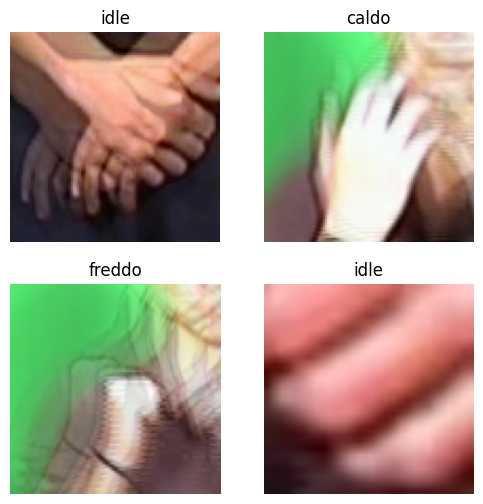

In [104]:
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(left_class_names[labels[i]])
    plt.axis("off")

In [132]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model training

In [133]:
num_classes = len(left_class_names)

#### Normal model

In [74]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [75]:
checkpoint_filepath = '/temp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

epoch_tracker = BestEpochTracker()

In [76]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [77]:
model.fit(
  train_ds,
  epochs=15,
  validation_data=val_ds,
  callbacks=[model_checkpoint_callback, epoch_tracker]
)

Epoch 1/15
6/6 [==============================] - 2s 197ms/step - loss: 2.6700 - accuracy: 0.0761 - val_loss: 2.6423 - val_accuracy: 0.1000
Epoch 2/15
6/6 [==============================] - 1s 88ms/step - loss: 2.5112 - accuracy: 0.1304 - val_loss: 2.6826 - val_accuracy: 0.1000
Epoch 3/15
6/6 [==============================] - 1s 109ms/step - loss: 2.2686 - accuracy: 0.3043 - val_loss: 2.4470 - val_accuracy: 0.2000
Epoch 4/15
6/6 [==============================] - 1s 96ms/step - loss: 1.7655 - accuracy: 0.5543 - val_loss: 1.9217 - val_accuracy: 0.2500
Epoch 5/15
6/6 [==============================] - 1s 103ms/step - loss: 1.2687 - accuracy: 0.5761 - val_loss: 1.8066 - val_accuracy: 0.3000
Epoch 6/15
6/6 [==============================] - 1s 127ms/step - loss: 0.9870 - accuracy: 0.6522 - val_loss: 1.5899 - val_accuracy: 0.4000
Epoch 7/15
6/6 [==============================] - 1s 121ms/step - loss: 0.6530 - accuracy: 0.7826 - val_loss: 1.4540 - val_accuracy: 0.5000
Epoch 8/15
6/6 [======

In [78]:
model.load_weights(checkpoint_filepath)

In [79]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 0s 94ms/step
Test accuracy: 0.6666667


#### Pruned model

In [138]:
dropout_value = 0.3

In [139]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  # Convolutional Layers
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),

  # Fully Connected Layers with Dropout
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(dropout_value),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])

checkpoint_filepath = '/temp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

epoch_tracker = BestEpochTracker()

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

model.fit(
  train_ds,
  epochs=15,
  validation_data=val_ds,
  callbacks=[model_checkpoint_callback, epoch_tracker]
)

Epoch 1/15


6/6 [==============================] - 2s 149ms/step - loss: 2.6861 - accuracy: 0.0978 - val_loss: 2.6504 - val_accuracy: 0.0000e+00
Epoch 2/15
6/6 [==============================] - 1s 118ms/step - loss: 2.5874 - accuracy: 0.1304 - val_loss: 2.6497 - val_accuracy: 0.1000
Epoch 3/15
6/6 [==============================] - 1s 103ms/step - loss: 2.4773 - accuracy: 0.1522 - val_loss: 2.6296 - val_accuracy: 0.1000
Epoch 4/15
6/6 [==============================] - 1s 106ms/step - loss: 2.3133 - accuracy: 0.2391 - val_loss: 2.4259 - val_accuracy: 0.1500
Epoch 5/15
6/6 [==============================] - 1s 115ms/step - loss: 2.0637 - accuracy: 0.3370 - val_loss: 2.1066 - val_accuracy: 0.2500
Epoch 6/15
6/6 [==============================] - 1s 115ms/step - loss: 1.7769 - accuracy: 0.4130 - val_loss: 2.0511 - val_accuracy: 0.2500
Epoch 7/15
6/6 [==============================] - 1s 123ms/step - loss: 1.4750 - accuracy: 0.5217 - val_loss: 1.4943 - val_accuracy: 0.3500
Epoch 8/15
6/6 [===========

In [140]:
model.load_weights(checkpoint_filepath)

In [141]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 3s 3s/step
Test accuracy: 0.73333335


In [142]:
ds = train_ds.concatenate(val_ds)

In [143]:
AUTOTUNE = tf.data.AUTOTUNE

ds = ds.cache().prefetch(buffer_size=AUTOTUNE)

In [144]:
num_classes = len(left_class_names)

In [83]:
left_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [84]:
left_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [85]:
left_model.fit(
  ds,
  epochs=epoch_tracker.best_epoch
)

Epoch 1/9


8/8 [==============================] - 2s 67ms/step - loss: 2.6373 - accuracy: 0.0982
Epoch 2/9
8/8 [==============================] - 1s 66ms/step - loss: 2.4672 - accuracy: 0.2232
Epoch 3/9
8/8 [==============================] - 1s 74ms/step - loss: 1.9712 - accuracy: 0.3661
Epoch 4/9
8/8 [==============================] - 1s 67ms/step - loss: 1.4215 - accuracy: 0.4911
Epoch 5/9
8/8 [==============================] - 1s 69ms/step - loss: 1.1843 - accuracy: 0.6071
Epoch 6/9
8/8 [==============================] - 1s 69ms/step - loss: 0.8354 - accuracy: 0.7232
Epoch 7/9
8/8 [==============================] - 1s 69ms/step - loss: 0.6384 - accuracy: 0.7679
Epoch 8/9
8/8 [==============================] - 1s 70ms/step - loss: 0.5806 - accuracy: 0.7857
Epoch 9/9
8/8 [==============================] - 1s 69ms/step - loss: 0.3652 - accuracy: 0.8571


In [145]:
left_pruned_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  # Fully Connected Layers with Dropout
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(dropout_value),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [146]:
left_pruned_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [147]:
left_pruned_model.fit(
  ds,
  epochs=epoch_tracker.best_epoch
)

Epoch 1/13
8/8 [==============================] - 1s 69ms/step - loss: 2.6449 - accuracy: 0.1250
Epoch 2/13
8/8 [==============================] - 1s 71ms/step - loss: 2.5224 - accuracy: 0.1607
Epoch 3/13
8/8 [==============================] - 1s 68ms/step - loss: 2.2386 - accuracy: 0.2679
Epoch 4/13
8/8 [==============================] - 1s 70ms/step - loss: 2.0071 - accuracy: 0.3125
Epoch 5/13
8/8 [==============================] - 1s 71ms/step - loss: 1.7500 - accuracy: 0.4018
Epoch 6/13
8/8 [==============================] - 1s 70ms/step - loss: 1.3707 - accuracy: 0.5357
Epoch 7/13
8/8 [==============================] - 1s 69ms/step - loss: 1.2554 - accuracy: 0.6161
Epoch 8/13
8/8 [==============================] - 1s 69ms/step - loss: 1.0754 - accuracy: 0.6429
Epoch 9/13
8/8 [==============================] - 1s 72ms/step - loss: 0.7881 - accuracy: 0.7768
Epoch 10/13
8/8 [==============================] - 1s 69ms/step - loss: 0.7833 - accuracy: 0.7500
Epoch 11/13
8/8 [============

In [ ]:
model_path = "./model_checkpoint/left_model_reduced"
# model_path = "./model_checkpoint/left_model"
# left_model.save_weights(model_path)
left_model.load_weights(model_path)

### Testing

In [90]:
len(test_ds)

1

In [91]:
left_class_names

['abitare',
 'acqua',
 'affitto',
 'banca',
 'caldo',
 'casa',
 'cibo',
 'data',
 'freddo',
 'idle',
 'interprete',
 'inviare',
 'lingua',
 'litro']

In [92]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = left_model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 0s 97ms/step
Test accuracy: 0.76666665


In [148]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = left_pruned_model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 0s 115ms/step
Test accuracy: 0.7


## Right model

### Dataset

In [112]:
# train_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/right modified/')
# test_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/right modified/')
train_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-train-seed59-v1/reduced/right modified/')
test_folder_path = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/right modified/')

In [113]:
train_batch_size = 16
img_height = 100
img_width = 100

In [114]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder_path,
  validation_split=0.18,
  subset="both",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=train_batch_size,
  shuffle=True)

Found 126 files belonging to 10 classes.
Using 104 files for training.
Using 22 files for validation.


In [115]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_folder_path,
  image_size=(img_height, img_width),
  batch_size=100)

Found 31 files belonging to 10 classes.


In [116]:
right_class_names = train_ds.class_names

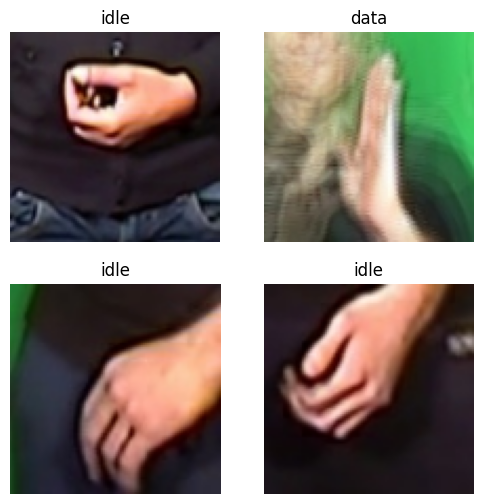

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(right_class_names[labels[i]])
    plt.axis("off")

In [118]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model training

In [119]:
num_classes = len(right_class_names)

In [85]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [86]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [87]:
checkpoint_filepath = '/temp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

epoch_tracker = BestEpochTracker()

In [88]:
model.fit(
  train_ds,
  epochs=15,
  validation_data=val_ds,
  callbacks=[model_checkpoint_callback, epoch_tracker]
)

Epoch 1/15


d:\Documentos\Polito\Thesis\Code\sign-language-recognition\thesis-venv\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 2s 128ms/step - loss: 1.9936 - accuracy: 0.4135 - val_loss: 1.5694 - val_accuracy: 0.5909
Epoch 2/15
7/7 [==============================] - 1s 78ms/step - loss: 1.6497 - accuracy: 0.4615 - val_loss: 1.2857 - val_accuracy: 0.5909
Epoch 3/15
7/7 [==============================] - 1s 99ms/step - loss: 1.3976 - accuracy: 0.5000 - val_loss: 1.1073 - val_accuracy: 0.6364
Epoch 4/15
7/7 [==============================] - 1s 95ms/step - loss: 1.1565 - accuracy: 0.5962 - val_loss: 0.9059 - val_accuracy: 0.6818
Epoch 5/15
7/7 [==============================] - 1s 86ms/step - loss: 0.8679 - accuracy: 0.7308 - val_loss: 0.6857 - val_accuracy: 0.7273
Epoch 6/15
7/7 [==============================] - 1s 113ms/step - loss: 0.5762 - accuracy: 0.8654 - val_loss: 0.5360 - val_accuracy: 0.8182
Epoch 7/15
7/7 [==============================] - 1s 79ms/step - loss: 0.4193 - accuracy: 0.8846 - val_loss: 0.5840 - val_accuracy: 0.8182
Epoch 8/15
7/7 [====================

In [89]:
model.load_weights(checkpoint_filepath)

In [90]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 0s 89ms/step
Test accuracy: 0.7741935


In [91]:
ds = train_ds.concatenate(val_ds)

In [92]:
AUTOTUNE = tf.data.AUTOTUNE

ds = ds.cache().prefetch(buffer_size=AUTOTUNE)

In [93]:
num_classes = len(right_class_names)

In [120]:
right_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [95]:
right_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [96]:
right_model.fit(
  ds,
  epochs=epoch_tracker.best_epoch
)

Epoch 1/6


9/9 [==============================] - 2s 69ms/step - loss: 1.9457 - accuracy: 0.4206
Epoch 2/6
9/9 [==============================] - 1s 71ms/step - loss: 1.4947 - accuracy: 0.4841
Epoch 3/6
9/9 [==============================] - 1s 67ms/step - loss: 1.2027 - accuracy: 0.5079
Epoch 4/6
9/9 [==============================] - 1s 70ms/step - loss: 0.9200 - accuracy: 0.6825
Epoch 5/6
9/9 [==============================] - 1s 78ms/step - loss: 0.6709 - accuracy: 0.7302
Epoch 6/6
9/9 [==============================] - 1s 77ms/step - loss: 0.4521 - accuracy: 0.8889


In [121]:
model_path = "./model_checkpoint/right_model_reduced"
# model_path = "./model_checkpoint/right_model"
# right_model.save_weights(model_path)
right_model.load_weights(model_path)

### Testing

In [122]:
len(test_ds)

1

In [123]:
right_class_names

['abitare',
 'banca',
 'caldo',
 'casa',
 'data',
 'freddo',
 'idle',
 'interprete',
 'inviare',
 'litro']

In [124]:
accuracy = tf.keras.metrics.Accuracy()

for x_batch, y_batch in test_ds:
    probabilites = right_model.predict(x_batch)
    predictions = np.argmax(probabilites, axis=-1)

    
    accuracy.update_state(y_batch, predictions)

final_accuracy = accuracy.result().numpy()
print("Test accuracy:", final_accuracy)

1/1 [==============================] - 0s 445ms/step
Test accuracy: 0.8064516


## Combined Inference

### Test dataset

In [126]:
# Function to extract file paths, prefixes, and labels
def get_image_prefixes_and_labels(folder_path):
    image_data = []
    for label_folder in folder_path.iterdir():
        if label_folder.is_dir():
            label = label_folder.name  # Folder name as the label
            for image_file in label_folder.iterdir():
                if image_file.is_file():
                    file_name = "_".join(image_file.stem.split("_")[:-1])
                    image_data.append((file_name, str(image_file), label))
    return image_data

# Function to preprocess images
def preprocess_image(image_path):
    if image_path is None:
        # Placeholder for missing images (e.g., black image or zeros)
        return tf.zeros((img_height, img_width, 3), dtype=tf.int32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = tf.cast(image, tf.int32)
    return image

# Function to create a tf.data.Dataset
def create_dataset(data):
    def generator():
        for left_path, right_path, label in data:
            yield (preprocess_image(left_path), preprocess_image(right_path)), label_to_index[label]
    
    return tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            (
                tf.TensorSpec(shape=(img_height, img_width, 3), dtype=tf.int32),
                tf.TensorSpec(shape=(img_height, img_width, 3), dtype=tf.int32),
            ),
            tf.TensorSpec(shape=(), dtype=tf.int32),  # Alterado para int32
        )
    )

In [127]:
# Paths to the left and right hand folders
# left_hand_folder = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/left/')
# right_hand_folder = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/right/')
left_hand_folder = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/left/')
right_hand_folder = pathlib.Path('D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-life/hei-videos-test-seed59-v1/reduced/right/')

# Image size and batch size
img_height, img_width = 100, 100  # Adjust as needed
batch_size = 2

# Get image paths, prefixes, and labels
left_images = get_image_prefixes_and_labels(left_hand_folder)
right_images = get_image_prefixes_and_labels(right_hand_folder)

# Create dictionaries to map prefixes to file paths and labels
left_dict = {prefix: (path, label) for prefix, path, label in left_images}
right_dict = {prefix: (path, label) for prefix, path, label in right_images}

# Match prefixes and align datasets with labels
aligned_data = []
for prefix in set(left_dict.keys()).union(right_dict.keys()):
    left_info = left_dict.get(prefix, (None, None))  # (path, label) or (None, None)
    right_info = right_dict.get(prefix, (None, None))
    aligned_data.append((left_info[0], right_info[0], left_info[1] or right_info[1]))

# Obter classes únicas
unique_labels = sorted(set(label for _, _, label in aligned_data))
label_to_index = {label: index for index, label in enumerate(unique_labels)}

test_data = aligned_data

In [128]:
test_ds = create_dataset(test_data).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [32]:
def plot_images_with_labels(dataset, num_samples=5):
    for i, ((left_images, right_images), labels) in enumerate(dataset.take(num_samples)):
        batch_size = left_images.shape[0]
        for j in range(batch_size):
            plt.figure(figsize=(8, 4))
            
            # Left image
            plt.subplot(1, 2, 1)
            plt.imshow(left_images[j].numpy())
            plt.title(f"Left Image - Label: {labels[j].numpy()}")
            plt.axis('off')
            
            # Right image
            plt.subplot(1, 2, 2)
            plt.imshow(right_images[j].numpy())
            plt.title(f"Right Image - Label: {labels[j].numpy()}")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()
            
        # Break after showing `num_samples` examples
        if i + 1 >= num_samples:
            break


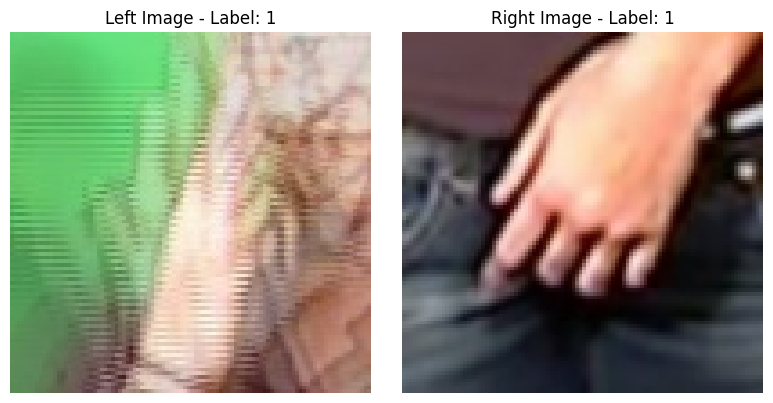

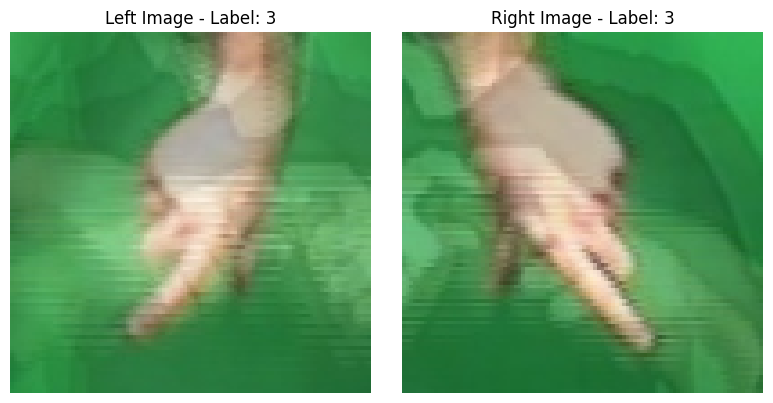

In [33]:
# Plot images with labels from the test dataset
plot_images_with_labels(test_ds, num_samples=1)

### Combined model

In [129]:
def average_model_predictions(model1, model2, test_ds, model1_class_names, model2_class_names, weight1=1, weight2=1, extra_weight2=4, top_for_extra=3):
    """
    Generates predictions from two models and averages their outputs, taking into account shared and non-shared labels.
    
    Parameters:
    - model1: The first trained model.
    - model2: The second trained model.
    - test_ds: A tf.data.Dataset containing test data. Each element should be a tuple (inputs, labels).
    - model1_class_names: List of class names for model1 (labels correspond to indices in this list).
    - model2_class_names: List of class names for model2.
    
    Returns:
    - Averaged predictions for all labels (shape: batch_size x len(model1_class_names)).
    - True labels for all model1 classes (shape: batch_size,).
    """
    # Find shared labels and their indices
    shared_labels = [label for label in model1_class_names if label in model2_class_names]
    shared_indices_model1 = [model1_class_names.index(label) for label in shared_labels]
    shared_indices_model2 = [model2_class_names.index(label) for label in shared_labels]
    
    predictions = []
    predictions1 = []
    predictions2 = []
    true_labels = []
    pred2_size = len(model2_class_names)
    
    for inputs, labels in test_ds:
        
        inputs1, inputs2 = inputs
        
        # Model predictions
        outputs1 = model1.predict(inputs1, verbose=0)  # Shape: (batch_size, len(model1_class_names))
        outputs2 = model2.predict(inputs2, verbose=0)  # Shape: (batch_size, len(model2_class_names))
        
        predictions1.append(outputs1)
        predictions2.append(outputs2)

        preds1 = outputs1.copy()
        preds2 = outputs2.copy()
        
        for i in range(len(inputs2)):
            if np.sum(inputs2[i]) == 0 or np.argmax(preds2[i]) == model2_class_names.index('idle'):
                preds2[i] = np.zeros_like(pred2_size)
            if model2_class_names[np.argmax(preds2[i])] in [model1_class_names[i] for i in np.argpartition(preds1[i], -top_for_extra)[-top_for_extra:]]:
                preds2[i] = extra_weight2 * preds2[i]
        
        # Create averaged predictions array
        averaged_preds = np.zeros_like(preds1)
        
        # Add model1 predictions
        averaged_preds += weight1 * preds1
        
        # Add model2 predictions for shared labels
        preds2_shared = tf.gather(preds2, indices=shared_indices_model2, axis=-1).numpy()
        averaged_preds[:, shared_indices_model1] += weight2 * preds2_shared
        
        for i in range(len(averaged_preds)):
            averaged_preds[i] = averaged_preds[i] / np.sum(averaged_preds[i])
        
        # Collect results
        predictions.append(averaged_preds)
        true_labels.append(labels.numpy())  # Labels are indices
    
    # Stack predictions and true labels
    predictions = np.vstack(predictions)
    predictions1 = np.vstack(predictions1)
    predictions2 = np.vstack(predictions2)
    true_labels = np.concatenate(true_labels)  # Final shape: (total_samples,)
    
    return predictions, true_labels, predictions1, predictions2

In [132]:
averaged_preds, true_labels, p1, p2 = average_model_predictions(left_model, right_model, test_ds, left_class_names, right_class_names, extra_weight2=4, top_for_extra=3)

# Check the averaged predictions
print("Averaged Predictions Shape:", averaged_preds.shape)

# Evaluate accuracy (optional, if true labels are available)
predicted_classes = np.argmax(averaged_preds, axis=1)
accuracy = np.mean(predicted_classes == true_labels)
print("Inference Accuracy:", accuracy)

Averaged Predictions Shape: (30, 14)
Inference Accuracy: 0.9


In [133]:
predicte1d_classes = np.argmax(p1, axis=1)
accuracy = np.mean(predicte1d_classes == true_labels)
print("Inference Accuracy:", accuracy)

Inference Accuracy: 0.7666666666666667


In [134]:
test_array = list(zip(p1, p2, averaged_preds, true_labels))

In [135]:
for i, (pred1, pred2, avg_pred, true_label_idx) in enumerate(test_array):
    # Ensure predictions are arrays
    pred1 = np.array(pred1) if np.isscalar(pred1) else pred1
    pred2 = np.array(pred2) if np.isscalar(pred2) else pred2
    avg_pred = np.array(avg_pred) if np.isscalar(avg_pred) else avg_pred

    # Get the top 3 indices and probabilities for model1 predictions
    top3_idx_p1 = np.argsort(pred1)[-3:][::-1]  # Indices of top 3 probabilities (descending order)
    top3_prob_p1 = pred1[top3_idx_p1]
    
    # Get the top 3 indices and probabilities for model2 predictions
    top3_idx_p2 = np.argsort(pred2)[-3:][::-1]
    top3_prob_p2 = pred2[top3_idx_p2]
    
    # Get the top 3 indices and probabilities for averaged predictions
    top3_idx_avg = np.argsort(avg_pred)[-3:][::-1]
    top3_prob_avg = avg_pred[top3_idx_avg]
    
    # Get the true label name
    true_label_name = left_class_names[true_label_idx]
    prediction_label = left_class_names[np.argmax(avg_pred)]
    
    # Display the results
    print(f"Sample {i + 1}:")
    print("  True Label:", true_label_name)
    print("  Prediction:", prediction_label)
    
    print("  Model 1 (left) Predictions:")
    for idx, prob in zip(top3_idx_p1, top3_prob_p1):
        print(f"    {left_class_names[idx]}: {prob * 100:.1f}%")
    
    print("  Model 2 (right) Predictions:")
    for idx, prob in zip(top3_idx_p2, top3_prob_p2):
        if idx < len(right_class_names):
            print(f"    {right_class_names[idx]}: {prob * 100:.1f}%")
        else:
            print(f"    Unknown: {prob * 100:.1f}%")
    
    print("  Averaged Predictions:")
    for idx, prob in zip(top3_idx_avg, top3_prob_avg):
        print(f"    {left_class_names[idx]}: {prob * 100:.1f}%")
    
    print("\n" + "-" * 50 + "\n")


Sample 1:
  True Label: data
  Prediction: data
  Model 1 (left) Predictions:
    inviare: 50.0%
    interprete: 18.9%
    litro: 14.1%
  Model 2 (right) Predictions:
    data: 86.8%
    caldo: 7.2%
    casa: 4.4%
  Averaged Predictions:
    data: 44.4%
    inviare: 25.1%
    interprete: 9.5%

--------------------------------------------------

Sample 2:
  True Label: caldo
  Prediction: caldo
  Model 1 (left) Predictions:
    cibo: 84.3%
    caldo: 15.7%
    acqua: 0.0%
  Model 2 (right) Predictions:
    caldo: 61.4%
    data: 31.9%
    casa: 3.8%
  Averaged Predictions:
    caldo: 52.3%
    data: 25.5%
    cibo: 16.9%

--------------------------------------------------

Sample 3:
  True Label: casa
  Prediction: casa
  Model 1 (left) Predictions:
    casa: 92.3%
    acqua: 7.4%
    cibo: 0.2%
  Model 2 (right) Predictions:
    caldo: 39.4%
    data: 30.8%
    casa: 23.0%
  Averaged Predictions:
    casa: 57.6%
    caldo: 19.7%
    data: 15.4%

----------------------------------------

# Real time test

In [15]:
import cv2
import sys
sys.path.insert(1, './hand-tracking')
import handtracker

In [21]:
cap = cv2.VideoCapture(0)
tracker = handtracker.HandTracker(hei_frame_step=2, hei_max_duration=2, hei_overlap=0)
success = True
normalization_layer = tf.keras.layers.Rescaling(1./255)

while success == True:
    success, image = cap.read()
    if success:
        tracker.tracking(image, subpixel_layout='BGR')         

        hei_left, hei_right = tracker.image_averaging(save=False)
        if len(hei_left) > 0:
            print("Check")
            hei_left = tf.image.resize(hei_left, [104,104])
            hei_left = np.expand_dims(hei_left, axis=0)
            print(f'Prediction: {class_names[int(np.argmax(model.predict(hei_left, verbose=0)))]}')

Check
Prediction: andata
Check
Prediction: andata
Check
Prediction: andata
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: amministrazione
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare
Check
Prediction: allegare


KeyboardInterrupt: 

In [22]:
cap.release()

In [26]:
class_names

['abbonamento',
 'abitare',
 'acqua',
 'affitto',
 'allegare',
 'allergia',
 'ambulanza',
 'amministrazione',
 'ancona',
 'andata']